In [3]:
#Preamble

import ipywidgets as widgets
import io
import os
import pandas as pd
import requests
from IPython.display import Javascript

pd.set_option("display.max_columns", 500)
pd.set_option("display.max_rows", 500)




# **Sample Analysis**
### Introduction
Add some instructions here

### **Step #0:** Lets get some census data to compare to

Select the CSV with the census race data for your town, and press "Load"

Dropdown(options=('Durham_arrests_charges.csv', 'Durham_census_race_table.csv'), value='Durham_arrests_charges…

Button(description='Load data file', style=ButtonStyle())

Output(layout=Layout(border_bottom='1px solid black', border_left='1px solid black', border_right='1px solid b…

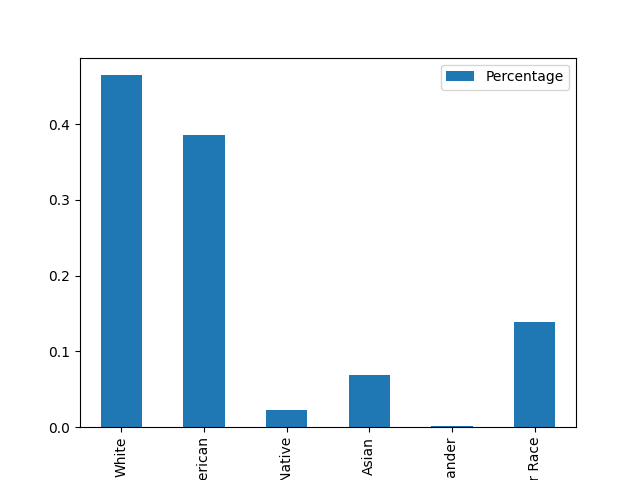

In [11]:

townRace = pd.DataFrame()
townRace.columns=['Race','Population','Percentage']

outputWidget0 = widgets.Output(layout={'border': '1px solid black'})

fileSelect0 = widgets.Dropdown(
    options= os.listdir('data/'),
    disabled=False
)
display(fileSelect0)
loadButton0 = widgets.Button(
    description='Load data file',
)
@outputWidget0.capture()
def load_data0():
    global townRace
    townRaceRaw = pd.read_csv(os.path.join("data/",fileSelect0.value),index_col=[0])
    townRaceRaw.columns=['Population']
    townRaceRaw['Population']=townRaceRaw['Population'].apply(lambda s: s.replace(',',''))
    townRaceRaw['Population']=townRaceRaw['Population'].astype('int')
    totalTownPopulation = townRaceRaw.filter(like='Total',axis='index').iloc[0,0]
    townRace = pd.DataFrame([["White",townRaceRaw.filter(like='White',axis='index')['Population'].sum()],
                          ["Black or African American", townRaceRaw.filter(like='Black',axis='index')['Population'].sum()],
                          ["American Indian or Alaskan Native", townRaceRaw.filter(like='American Indian',axis='index')['Population'].sum()],
                          ["Asian", townRaceRaw.filter(like='Asian',axis='index')['Population'].sum()],
                          ["Native Hawaiian or Other Pacific Islander",townRaceRaw.filter(like='Native Hawaiian',axis='index')['Population'].sum()],
                          ["Some Other Race", townRaceRaw.filter(like='Other',axis='index')['Population'].sum()]])
    townRace.columns=['Race','Population']
    townRace['Percentage']=townRace['Population']/totalTownPopulation
    
#    with outputWidget0:
    display("Successfully loaded the datafile " + fileSelect0.value )
    display("The total population of your town is " + str(totalTownPopulation))
        #display(townRace)


loadButton0.on_click(lambda b: load_data0())
display(loadButton0,outputWidget0)



<AxesSubplot: xlabel='Race'>

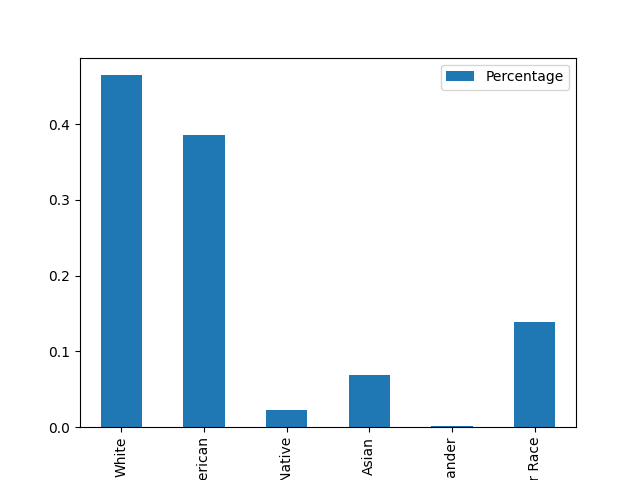

In [14]:
%matplotlib widget
townRace.plot.bar(x='Race',y='Percentage')

### **Step #1:** Load the police data

Select your police datafile from the dropdown, and then press load.
You may need to upload your datafile to the "data" directory on the left.

In [4]:
outputWidget = widgets.Output(layout={'border': '1px solid black'})

fileSelect = widgets.Dropdown(
    options= os.listdir('data/'),
    disabled=False
)
display(fileSelect)
loadButton = widgets.Button(
    description='Load data file',
)
def load_data():
    global arrests
    arrests = pd.read_csv(os.path.join("data/",fileSelect.value),index_col=[0])
    display(Javascript('IPython.notebook.execute_cells_below()'))
    with outputWidget:
        display("Successfully loaded the datafile " + fileSelect.value )

loadButton.on_click(lambda b: load_data())
display(loadButton,outputWidget)

Dropdown(options=('Durham_arrests_charges.csv', 'Durham_census_race_table.csv'), value='Durham_arrests_charges…

Button(description='Load data file', style=ButtonStyle())

Output(layout=Layout(border_bottom='1px solid black', border_left='1px solid black', border_right='1px solid b…

<IPython.core.display.Javascript object>

Let's take a quick look at the data.  Select how many rows you would like to preview, then press the 'Preview' button.

In [5]:
outputWidget2 = widgets.Output(layout={'border': '1px solid black'})
# Take a first look:
pd.set_option("display.max_rows", None)
numRows = widgets.Dropdown(
    options=['5', '10', '15', '20'],
    value='5',
    description='Number:',
    disabled=False,
)
display(numRows)
previewButton = widgets.Button(
    description='Preview',
)
def preview_data():
    outputWidget2.clear_output()
    with outputWidget2:
        display(arrests.sample(int(numRows.value)))

previewButton.on_click(lambda b: preview_data())
display(previewButton,outputWidget2)

Dropdown(description='Number:', options=('5', '10', '15', '20'), value='5')

Button(description='Preview', style=ButtonStyle())

Output(layout=Layout(border_bottom='1px solid black', border_left='1px solid black', border_right='1px solid b…

### **Step #2:** Which type of data do we have

In [6]:
outputWidget3 = widgets.Output(layout={'border': '1px solid black'})
layout = widgets.Layout(width='auto', height='40px') #set width and height
columnsButton = widgets.Button(
    description='Click here to continue',
    layout=layout,
)
def displayColumns():
    with outputWidget3:
        #display(arrests.columns)
        global raceDropDown
        raceDropDown = widgets.Dropdown(
            options=arrests.columns,
            disabled=False,
        )
        display(raceDropDown)
columnsButton.on_click(lambda b: displayColumns())




Button(description='Display column names', layout=Layout(height='40px', width='auto'), style=ButtonStyle())

Output(layout=Layout(border_bottom='1px solid black', border_left='1px solid black', border_right='1px solid b…

Which of these columns represents a demographic category of interest, like race?

In [ ]:
display(columnsButton,outputWidget3)

In [7]:
outputWidget4 = widgets.Output(layout={'border': '1px solid black'})

def displayRaceDropdown():
    with outputWidget4:
        display(raceDropDown)

newButton=widgets.Button(
    description='Click here',
    layout=layout,
)
newButton.on_click(lambda b: displayRaceDropdown())
display(newButton,outputWidget4)
#display(raceDropDown)


Button(description='Display column names', layout=Layout(height='40px', width='auto'), style=ButtonStyle())

Output(layout=Layout(border_bottom='1px solid black', border_left='1px solid black', border_right='1px solid b…

Dropdown(options=('agencyname', 'datetimeofarrest', 'file', 'arrestnumber', 'scars_tattoes_bodymarkings_etc', …

In [14]:
outputWidget5 = widgets.Output(layout={'border': '1px solid black'})

def displaySummary():
    with outputWidget5:
        display(arrests[raceDropDown.value].value_counts(normalize=True))

goButton = widgets.Button(
    description='Go',
    layout=layout,
)

goButton.on_click(lambda b: displaySummary())
display(goButton,outputWidget5)

Button(description='Go', layout=Layout(height='40px', width='auto'), style=ButtonStyle())

Output(layout=Layout(border_bottom='1px solid black', border_left='1px solid black', border_right='1px solid b…

B    0.776757
W    0.215869
A    0.003597
U    0.001925
I    0.001853
Name: race, dtype: float64